In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df= pd.read_csv('data_012.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
x= df.drop("Diabetes_012", axis=1)
y=df["Diabetes_012"]

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Resample toàn bộ tập dữ liệu
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Chia thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [11]:
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming your data is stored in a variable named 'data'
# Replace 'your_data.csv' with the actual file path if your data is in a CSV file


# Assuming your target variable is 'HolCheck'

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


KeyboardInterrupt: 

HighBP: 0.1407364583128617
BMI: 0.11990798201830626
GenHlth: 0.10241218804672016
Age: 0.09601836419929752
HighChol: 0.07888804633798292
Income: 0.07218837747777532
Education: 0.05542277588165713
PhysHlth: 0.050850454734566085
MentHlth: 0.041339382465051915
Sex: 0.03651697478346038
Smoker: 0.03617570314998768
Fruits: 0.030328459205991688
PhysActivity: 0.02866834483304483
Veggies: 0.026815372255322902
DiffWalk: 0.020597393618155855
HeartDiseaseorAttack: 0.019279884623830103
NoDocbcCost: 0.013203905050178377
Stroke: 0.010619427927661306
HvyAlcoholConsump: 0.010008947627595393
AnyHealthcare: 0.007451810929890356
CholCheck: 0.002569746520662185


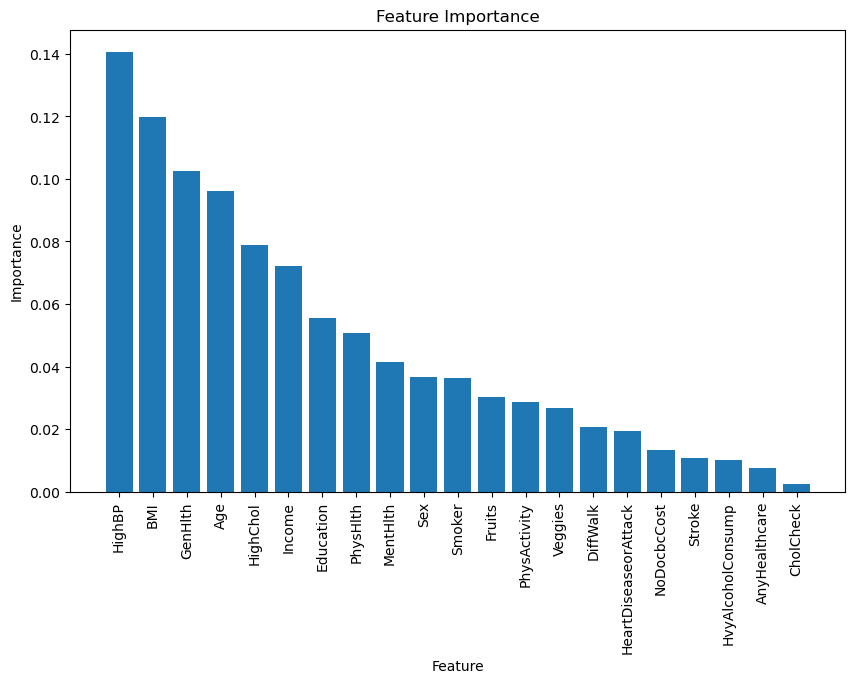

In [16]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Xây dựng mô hình
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Lấy đặc trưng quan trọng từ mô hình
feature_importances = clf.feature_importances_

# Hiển thị đặc trưng quan trọng theo thứ tự giảm dần
indices = np.argsort(feature_importances)[::-1]
for f in range(x_train.shape[1]):
    print(f"{x_train.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Vẽ biểu đồ đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


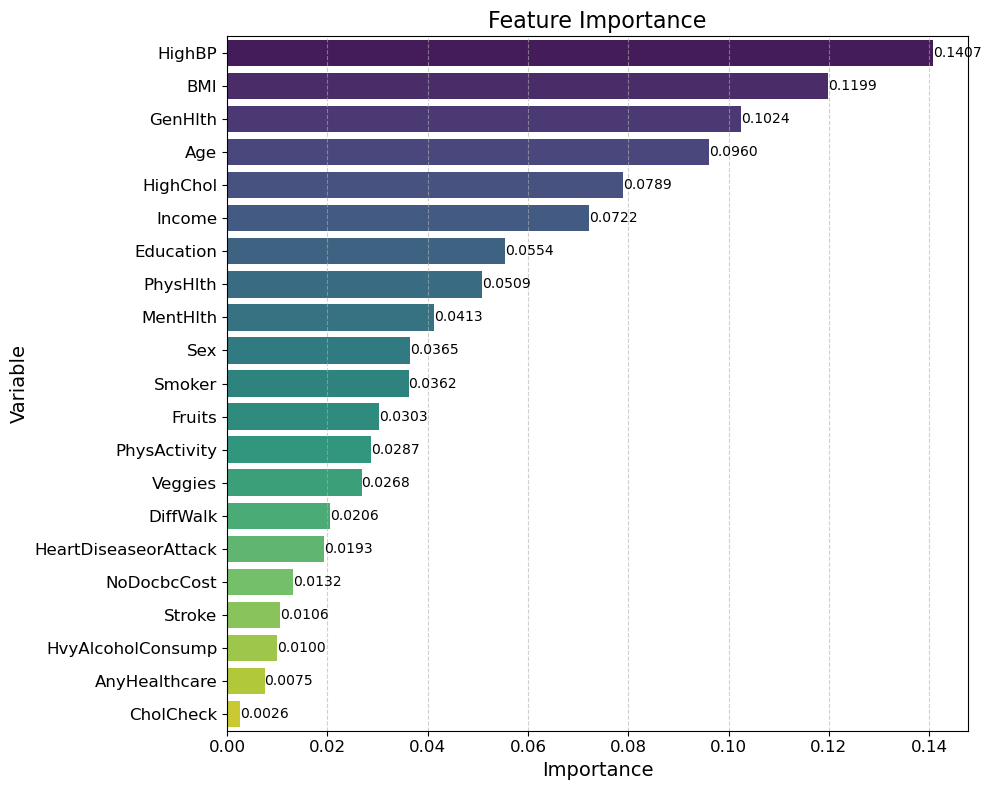

In [18]:
# Tính feature importance
feature_importance = clf.feature_importances_

# Tạo một DataFrame để hiển thị thông tin
import pandas as pd
feature_importance_df = pd.DataFrame({'Variable': x_train.columns, 'Importance': feature_importance})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị biểu đồ cột về độ quan trọng của các biến
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Variable', data=feature_importance_df, palette='viridis')

# Thêm tiêu đề và định dạng
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị giá trị của độ quan trọng trên từng cột
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')

# Hiển thị lưới để dễ đọc
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tăng khoảng cách giữa các cột để dễ nhìn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


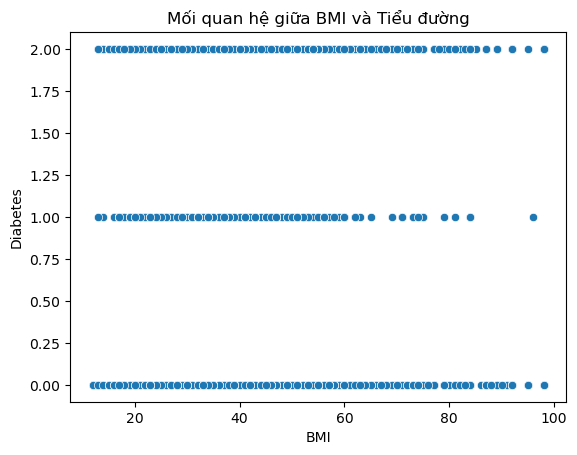

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df là DataFrame chứa dữ liệu, 'BMI' và 'Diabetes' là tên cột
sns.scatterplot(x='BMI', y='Diabetes_012', data=df)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Mối quan hệ giữa BMI và Tiểu đường')
plt.show()


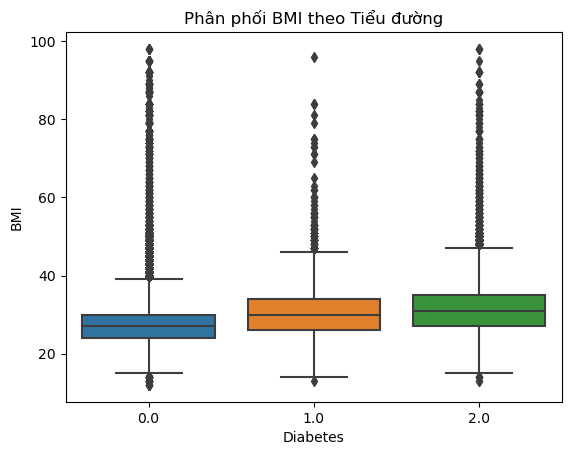

In [11]:
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('Phân phối BMI theo Tiểu đường')
plt.show()


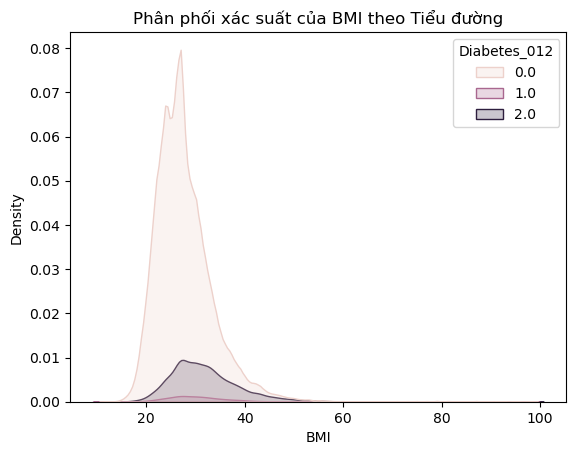

In [12]:
sns.kdeplot(data=df, x='BMI', hue='Diabetes_012', fill=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Phân phối xác suất của BMI theo Tiểu đường')
plt.show()


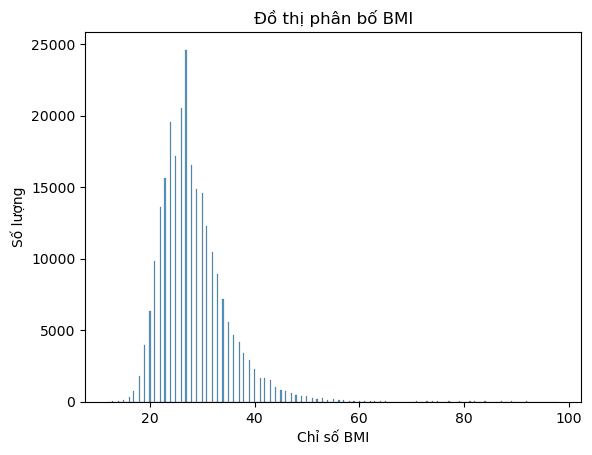

In [14]:
ht=sns.histplot(data=df, x='BMI');
#specfiy axis labels
ht.set(xlabel='Chỉ số BMI',
       ylabel='Số lượng',
       title='Đồ thị phân bố BMI')
plt.show()

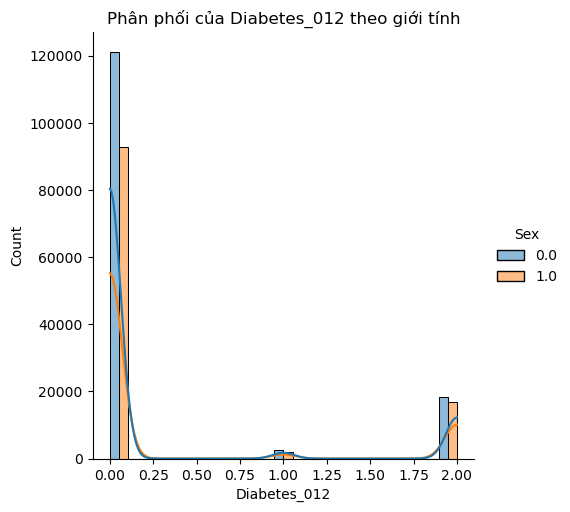

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df là DataFrame chứa dữ liệu, 'Diabetes_012' và 'Sex' là tên cột
sns.displot(data=df, x='Diabetes_012', hue='Sex', multiple='dodge', kde=True)

plt.title('Phân phối của Diabetes_012 theo giới tính')
plt.show()


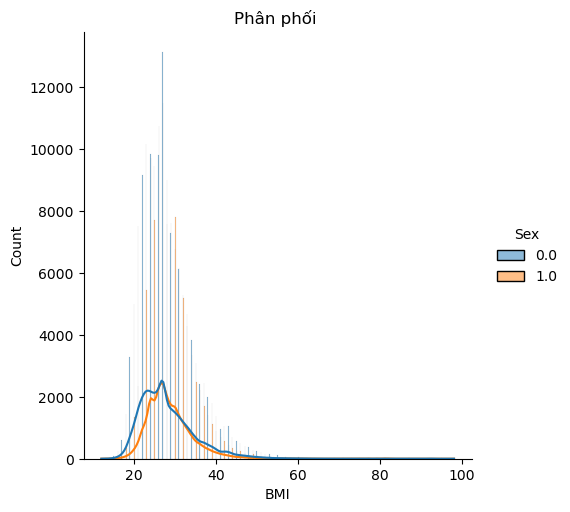

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df là DataFrame chứa dữ liệu, 'Diabetes_012' và 'Sex' là tên cột
sns.displot(data=df, x='BMI', hue='Sex', multiple='dodge', kde=True)

plt.title('Phân phối ')
plt.show()


In [22]:
df


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


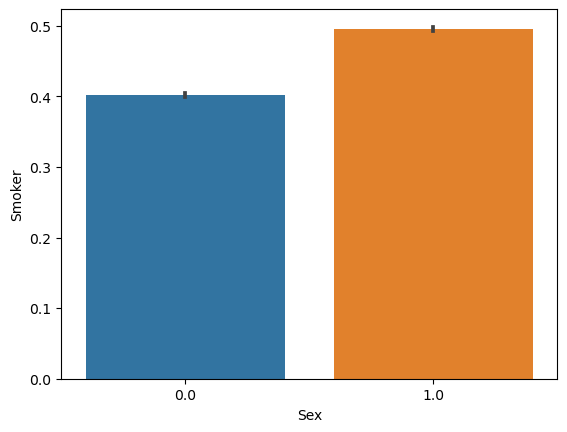

In [27]:
bar=sns.barplot(data=df, x="Sex", y="Smoker");

In [2]:
import pandas as pd

# Tạo DataFrame đơn giản
data = {'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', 'Orange']}
df = pd.DataFrame(data)

# In thông tin về kiểu dữ liệu trước khi chuyển đổi
print("Kiểu dữ liệu trước khi chuyển đổi:")
print(df.dtypes)
print(df)
# Chuyển đổi cột 'Fruit' thành kiểu categorical
df['Fruit'] = df['Fruit'].astype('category')

# In thông tin về kiểu dữ liệu sau khi chuyển đổi
print("\nKiểu dữ liệu sau khi chuyển đổi:")
print(df.dtypes)

# In DataFrame
print("\nDataFrame sau khi chuyển đổi:")
print(df)

Kiểu dữ liệu trước khi chuyển đổi:
Fruit    object
dtype: object
    Fruit
0   Apple
1  Banana
2  Orange
3   Apple
4  Orange

Kiểu dữ liệu sau khi chuyển đổi:
Fruit    category
dtype: object

DataFrame sau khi chuyển đổi:
    Fruit
0   Apple
1  Banana
2  Orange
3   Apple
4  Orange


In [3]:
import pandas as pd

# Tạo DataFrame đơn giản
data = {'Category': ['A', 'B', 'A', 'C']}
df = pd.DataFrame(data)

# In kiểu dữ liệu trước khi chuyển đổi
print("Kiểu dữ liệu trước khi chuyển đổi:")
print(df.dtypes)

# Chuyển đổi cột 'Category' thành kiểu categorical
df['Category'] = df['Category'].astype('category')

# In kiểu dữ liệu sau khi chuyển đổi
print("\nKiểu dữ liệu sau khi chuyển đổi:")
print(df.dtypes)

Kiểu dữ liệu trước khi chuyển đổi:
Category    object
dtype: object

Kiểu dữ liệu sau khi chuyển đổi:
Category    category
dtype: object
